In [24]:
import random
import pandas as pd
import numpy as np
import time
import pickle
directory = "C:/Users/Sergio/Documents/python projects/Dice/"

In [25]:
class Die: # 
    def __init__(self,sides): 
        self.sides = sides #sides specified as an array at initialization
        self.score = 0
        
        self.wins = 0 #how many MUs it wins/draws/loses
        self.losses = 0
        self.contests = 0
        
        self.possWins = 0 #how many possible interactions it wins/draws/loses
        self.possLosses = 0
        self.possContests = 0
        
        self.matchups = []
        
    def show(self): #print info for die
        draws = self.contests - (self.wins + self.losses)
        possDraws = self.possContests - (self.possWins + self.possLosses)
        
        winPercent = str(100*self.wins/self.contests)[0:6] + "%"
        drawPercent = str(100*draws/self.contests)[0:6] + "%"
        lossPercent = str(100*self.losses/self.contests)[0:6] + "%"
        
        possWinPercent = str(100*self.possWins/self.possContests)[0:6] + "%"
        possDrawPercent = str(100*possDraws/self.possContests)[0:6] + "%"
        possLossPercent = str(100*self.possLosses/self.possContests)[0:6] + "%"
               
        
        print(self.sides,end = "\t")
        print(str(self.wins) + "\t" + str(draws) + "\t" + str(self.losses),end = "\t")
        print(winPercent + "\t" + drawPercent + "\t" + lossPercent,end = "\t")
        
        print(str(self.possWins) + "\t" + str(possDraws) + "\t" + str(self.possLosses),end = "\t")
        print(possWinPercent + "\t" + possDrawPercent + "\t" + possLossPercent,end = "\t")
        
        print()

        
    def play(self):
        self.contests = self.contests + 1
    
    def win(self):
        self.wins = self.wins+1
        
    def lose(self):
        self.losses = self.losses+1
        
    def roll(self):
        return random.choice(self.sides)
    
    def half(self): # divides attributes by 2 since all values are doubled when calculated
        self.wins /= 2
        self.losses /= 2
        self.contests /= 2
        
        self.possWins /= 2
        self.possLosses /= 2
        self.possContests /= 2
        
    def clearMatches(self): # reset matches data
        self.wins = 0
        self.losses = 0
        self.contests = 0
        
        self.possWins = 0
        self.possLosses = 0
        self.possContests = 0
        
        self.matchups = []

In [26]:
class AllDice:# set of dice
    def __init__(self):
        self.dice = [] # dice in set as array of dice
        self.build() # build a set of every possible die
        self.fightAll()
        #self.show()
        
    def build(self):# every [possible 6-sided die with 21 total]
        for a in range(4,22):# largest number in the dice can only be between 4 and 21 ([4,4,4,3,3,3] to [21,0,0,0,0,0])
            for b in range(11):# second largest number can only be as high as 10 [11,10,0,0,0,0]
                if a<b:
                    break # if the 2nd number is greater than the 1st, quit out of loop
                for c in range(8):# 3rd number goes up to 7 [7,7,7,0,0,0]
                    if b<c:
                        break
                    for d in range(6):# 4th number goes to 5 [6,5,5,5,0,0]
                        if c<d:
                            break
                        for e in range(5):# and so on [5,4,4,4,4,0]
                            if d<e:
                                break
                            for f in range(4):# [4,4,4,3,3,3]
                                if e<f:
                                    break
                                if (a+b+c+d+e+f)==21:# only add to list if numbers add to 21
                                    self.dice.append(Die([a,b,c,d,e,f]))
                                    
    def show(self):# print data for every die in table-friendly manner
        #print(len(self.dice))
        print("sides",end = "\t")
        
        print("MU wins",end = "\t")
        print("MU draws",end = "\t")
        print("MU losses",end = "\t")
        print("MU win %",end = "\t")
        print("MU draw %",end = "\t")
        print("MU loss %",end = "\t")
        
        print("total wins",end = "\t")
        print("total draw",end = "\t")
        print("total losses",end = "\t")
        print("total win %",end = "\t")
        print("total draws %",end = "\t")
        print("total loss %")
        for i in self.dice:
            i.half()
            i.show()
            
    def saveDice(self,name):
        try:
            f = open(name+".obj",'wb')
            pickle.dump(self.dice,f)
        finally:
            f.close()
    
    
    def loadDice(self,name):
        try:
            f = open(name+".obj",'rb')
            print("dice loaded")
            self.dice = pickle.load(f)
            self.fightAll()
        finally:
            f.close()
            
            
    def clearMatches(self):
        for i in self.dice:
            i.clearMatches()    
            
            
    def removeDie(self,die): # remove one die from pool
        try:
            self.dice.remove(die)
            print("removed")
        except:
            print("failed!")
            pass
        
        
    def removeDice(self,diceList): # remove list of dice
        for d in diceList:
            print(d.sides)
            self.removeDie(d)
            
            
    def removeDieSides(self,die): # remove one die from pool
        sides = die.sides
        
        for d in self.dice:
            if d.sides == sides:
                self.removeDie(d)
                return
        
        
    def removeDiceSides(self,diceList): # remove list of dice
        for d in diceList:
            print(d.sides)
            self.removeDieSides(d)
            
            
    def fightAll(self): # analyze all dice by comparing them to each other twice
        self.clearMatches()
        
        for i in self.dice:
            for j in self.dice:
                winner,margin = Contest(i,j)
                if (winner == i) or (not winner):
                    i.matchups.append(margin)
                else:
                    i.matchups.append(-margin)
                    
                    
    def generatePopulation(self, step=1000):
        pop = Population(self.dice,step)
        return pop
                
                
    def limitMU(self,limit): # removes dice below a certain MU win % (not used)
        passList = []
        for i in self.dice:
            if (i.wins/i.contests) >= limit:
                passList.append(i)
            self.dice = passList
            
            
    def limitTotal(self,limit): # removes dice below a certain possible interaction win % (not used)
        passList = []
        for i in self.dice:
            if (i.possWins/i.possContests) >= limit:
                passList.append(i)
            self.dice = passList
            
            
    def removeObsolete(self): # removes obsolete dice (dice that win no MUs or only win MUs against other obsolete dice)
        passList = []
        count = 0
        
        for i in self.dice:
            if i.wins > 0:
                passList.append(i)
            else:
                count += 1
                
            self.dice = passList
        
        if count > 0:
            self.clearMatches()
            self.fightAll()
            self.removeObsolete()
            
            
    def removeDominated(self): # removes dominated dice
        passList = []
        count = 0
        
        for i in self.dice:
            for j in self.dice:
                dominated = CheckDominated(i.matchups,j.matchups)
                
                if dominated and (i != j):
                    break
                dominated = False
                
            if not dominated:
                passList.append(i)
            else:
                count += 1;
        
        self.dice = passList
                
        if count > 0:
            print("removed " + str(count) + " dominated dice")
            self.clearMatches()
            self.fightAll()
            self.removeDominated()
        self.clearMatches()
        self.fightAll()
        
        
    def generateMixedMUs(self,number): # generates sets of payoffs for mixed strategies of support 2
        MUs = []
        
        for i in self.dice:
            for j in self.dice:
                
                if i==j: #i and j should not be equal
                    continue
                
                for n in range(number-1):
                    split = (n+1)/number
                    MUs.append(mixTwo(i.matchups, j.matchups, split))
                    
        return MUs
    
    
    def removeDominatedMixed(self,number): # removes dice dominated by mixed strategies
        passList = []
        count = 0
        
        mixed = self.generateMixedMUs(number)
        
        for i in self.dice:
            for j in mixed:
                dominated = CheckDominated(i.matchups,j)
                
                if dominated:
                    break
                dominated = False
                
            if not dominated:
                passList.append(i)
                print(i.sides)
                print("passed")
                print()
            else:
                count += 1;
                print(i.sides)
                print("failed")
                print()
        
        self.dice = passList
                
        if count > 0:
            print("removed " + str(count) + " dominated dice")
            self.clearMatches()
            self.fightAll()
            self.removeDominatedMixed(number)
        self.clearMatches()
        self.fightAll()
            
    def removeNumber(self,number):
        passList = []
        for d in self.dice:
            if number not in d.sides:
                passList.append(d)
        self.dice = passList
            
    def showMUs(self,die): # print every MU within the set for a given die
        print(die.sides,end = "\t")
        print("Matchups")
        for d in self.dice:
            winner,margin = Contest(die,d)
            print(d.sides,end = "\t")
            if (winner == die) or (not winner):
                print("+" + str(margin))
            else:
                print("-" + str(margin))
                
    def saveMUs(self,die): # print every MU within the set for a given die into txt file
        MUfolder = directory + "MUs/" # MU txt folder
        
        try:
            f = open(MUfolder + str(die.sides) + ".txt", 'w')
            
            f.write("Matchup\tValue\n")
        
            for d in self.dice:
                winner,margin = Contest(die,d)
                f.write(str(d.sides) + "\t")
                if (winner == die) or (not winner):
                    f.write("+" + str(margin))
                else:
                    f.write("-" + str(margin))
                f.write("\n")
                    
        finally:
            f.close()
        
        
    def saveAllMUs(self):
        for d in self.dice:
            self.saveMUs(d)
            
            
    def tableMUs(self):
        try:
            f = open("MU Table.csv",'w')
            
            f.write("Die")
            
            for d in self.dice:
                f.write("\t" + str(d.sides))
            
            for d in self.dice:
                f.write("\n")
                f.write(str(d.sides))
                
                for e in self.dice:
                    f.write("\t")
                    winner,margin = Contest(d,e)
                    
                    if (winner == d) or (not winner):
                        f.write("+" + str(margin))
                    else:
                        f.write("-" + str(margin))
                        
        finally:
            f.close()
        

In [27]:
class Population:# large population of agents
    def __init__(self, dice, step):
        self.dice = dice # set of available dice
        self.step = 1/step # step size for population dynamics
        self.M = len(self.dice)
        self.xBalance()
        self.findA()
        self.findPayoffs()
        #self.show()    
        
    def findA(self): # find payoff matrix A (matchup table)
        A = np.array([]) 
        for d in self.dice:
            if A.size==0:
                A = np.array([d.matchups])
            else:            
                A = np.append(A, [np.array(d.matchups)], axis=0)
        self.A = A
    
    
    def findPayoffs(self): # find cost vector J
        J = np.matmul(self.A,self.x)
        avgJ = np.matmul(self.x.transpose(),J)
        self.J = J
        self.avgJ = avgJ
        
    
    def xBalance(self): # spread population strategies evenly
        frac = 1/self.M
        self.x = np.ones([self.M,1])*frac
        
        
    def singleStrat(self,die): # changes entire population to one strategy
        self.x = np.zeros([self.M,1])
        self.x[die,0] = 1.0        
    
        
    def xLoad(self, fileName): # load population from file
        x = []
        fileName = directory + fileName + ".txt"
        try:
            f = open(fileName, 'r')
            for i in range(self.M):
                x.append(float(f.readline()))
            
        finally:
            f.close()
            if len(x) == self.M:
                x = np.array(x)
                x = np.expand_dims(x,axis=1)
                self.x = x
                print("loaded")
            else:
                print("load failed")
        
    
    def savePop(self,name):
        try:
            f = open(name+".obj",'wb')
            pickle.dump(self.x,f)
        finally:
            f.close()
    
    
    def loadPop(self,name):
        try:
            f = open(name+".obj",'rb')
            print("pop loaded")
            self.x = pickle.x(f)
        finally:
            f.close()
    
    
    def directChangeBNN(self):
        dx = []
        self.findPayoffs()
        
        for j in range(self.M):
            dx_j = Positive(self.J[j] - self.avgJ)
            x_j = self.x[j,0]
            
            for k in range(self.M):
                try:
                    dx_j -= x_j * Positive(self.J[k] - self.avgJ)
                except:
                    print(x_j)
                    print(Positive(self.J[k] - self.avgJ))
                
            dx.append(dx_j)
            
        dx = np.array(dx)
        dx = np.squeeze(dx,1)
        
        return dx
    
    
    def BNN(self, epochs, interval, fname="BNNData", write=True):
        try:
            
            if write:
                f = open(directory + fname + ".csv", 'w')

                f.write("Day\t") # write table header
                for d in self.dice:
                    f.write(str(d.sides))
                    f.write("\t")
                f.write("\n")

            percent = epochs / 100
            
            for i in range(epochs):
                if write:
                    if i % interval == 0:
                        f.write(str(i))
                        f.write(str("\t"))
                        for d in range(self.M):
                            f.write(str(self.x[d].squeeze()))
                            f.write("\t")
                        f.write("\n")
                
                dx = self.directChangeBNN()
                self.x += dx*self.step
                
                if (i % percent) == 0:
                    print(str(int((i/epochs)*100)) + "%")
                    
        finally:
            if write:
                f.close()
            print("done!")
            
            
    def findBadDiceBNN(self, thresh=0.001):
        killList = self.dice.copy()
        
        for n,d in enumerate(self.dice):
            self.singleStrat(n) # change entire population to one die
            print(d.sides)
            self.BNN(2000,100,write=False)
            
            for i,j in enumerate(self.x):
                j = j.squeeze()
                
                if j > thresh:
                    try:
                        RemoveAttempt(self.dice[i], killList) #remove dice that are above threshold from the killList
                    except:
                        print(i)
                    
        return killList
    
    
    def findEqBNN(self, iterations, step=10000):
        step = 1/step
        dx = self.directChangeBNN()
        mag = np.linalg.norm(dx)
        x = self.x.copy()        
        x2 = self.x.copy()
        
        pos = random.randrange(self.M)
        neg = random.randrange(self.M)
        
        while neg == pos:
            neg = random.randrange(self.M)
        
        x2[pos,0] += step
        x2[neg,0] -= step
        
        dx2 = self.directChangeBNN()
        
        

In [28]:
random.randrange(2)

1

In [29]:
class Player: # a player within a competitive scene with a main die
    def __init__(self,dice):
        self.dice = dice # set of dice to choose from
        self.mainDie = random.choice(self.dice) # start with a random main die
        self.wins = 0
        self.intelligent = False
        self.attach = 5 # starting attachment value
        self.attachCap = 500
        self.scene = 0
    
    def show(self):
        print("Main: ",end = "\t")
        print(self.mainDie.sides,end = "\t")
        print(self.attach)
        
    def showWins(self):
        print("Main: ",end = "\t")
        print(self.mainDie.sides,end = "\t")
        print(self.wins)
        
    def changeMains(self): # pick a random new main
        if self.intelligent:
            self.scene.evaluateMeta()
            topDice = []
            topScore = 0
            for d in self.dice:
                if d.score >= topScore:
                    if d.score > topScore:
                        topScore = d.score
                        topDice = []
                    topDice.append(d)
            self.mainDie = random.choice(topDice)
            self.attach = 1
        else:
            self.mainDie = random.choice(self.dice)
            self.attach = 5
        
         # reset attachment
        
    def lose(self): # if a player loses a fight, their attachment goes down
        self.attach -= 1
        if self.attach < 1: # change mains if attachment reaches 0
            self.changeMains()
    
    def win(self):
        if self.attach < self.attachCap: #attachment cannot exceed 1000 (done to ensure metagame does not slow down due to inertia)
            self.attach += 1
        
    def roll(self): # roll its main die
        return self.mainDie.roll()
    
    def chooseMain(self,die):
        self.mainDie = die
        
    def winTournament(self):
        self.wins += 1
    
    def makeIntelligent(self):
        self.intelligent = True
        self.attachCap = 1

        
        
        
class Scene:# competitive scene full of players
    def __init__(self,popSize,dice):
        self.players = [] # players in scene
        self.popSize = popSize # number of players in scene
        self.dice = dice # set of dice available in scene
        self.day = 0 # current generation (1 day per tournament)
        
        for i in range(self.popSize): # populate scene
            self.players.append(Player(self.dice))
            
    def tournament(self): # each player fights 1 random other player
        bracket = self.players.copy()
        random.shuffle(bracket)
        while len(bracket) > 0:
            playerA = bracket.pop()
            playerB = bracket.pop()
            Fight(playerA,playerB)
        
            
    def show(self):
        for i in self.players:
            i.show()
            
    def countDie(self,die): # count how many players currently main a given die
        count = 0
        for p in self.players:
            if p.mainDie == die:
                count += 1
        return count
    
    def stabilize(self):
        while (len(self.players) % len(self.dice)) > 0:
            self.players.append(Player(self.dice))
        
        for i in range(len(self.players)):
            j = i
            if j >= len(self.dice):
                j -= len(self.dice)
            p = self.players[i]
            d = self.dice[j]
            p.chooseMain(d)
            
    def makePlayersIntelligent(self):
        for p in self.players:
            p.makeIntelligent()
            p.scene = self
            
    def evaluateDie(self,die):
        dieScore = 0
        for p in self.players:
            dieScore += matchups.at[str(die.sides),str(p.mainDie.sides)]
        die.score = dieScore
        return dieScore
    
    def evaluateMeta(self):
        for d in self.dice:
            dieScore = self.evaluateDie(d)
            
    def choosePlayerMain(self,die):
        for p in self.players:
            p.chooseMain(die)
            
    def runSceneSim(self,duration,interval): # run simulation
        try:
            f = open(directory + "SimulationData.csv", 'w')
            
            f.write("Day\t")
            for d in self.dice:
                f.write(str(d.sides))
                f.write("\t")
            f.write("\n")
            percent = duration / 100
            
            for i in range(duration):
#                 self.evaluateMeta()
                self.tournament()
                if self.day % interval == 0:
                    f.write(str(self.day))
                    f.write(str("\t"))
                    for d in self.dice:
                        f.write(str(self.countDie(d)))
                        f.write("\t")
                    f.write("\n")
                self.day += 1
                
                if (i % percent) == 0:
                    print(str((i/duration)*100) + "%")
        finally:        
            f.close()
            print("done!")

In [30]:
def Contest(dieA,dieB): # analytical comparison between 2 dice
    contests = 0
    winsA = 0
    lossA = 0
    winsB = 0
    lossB = 0
    
    dieA.play()
    dieB.play()
    
    for a in dieA.sides:
        for b in dieB.sides:
            contests = contests + 1
            if a>b:
                winsA = winsA + 1
                lossB = lossB + 1
            elif b>a:
                winsB = winsB + 1
                lossA = lossA + 1
                
    dieA.possWins += winsA
    dieA.possLosses += lossA
    dieA.possContests += contests
    
    dieB.possWins += winsB
    dieB.possLosses += lossB
    dieB.possContests += contests
    
                
    if winsA>winsB:
        dieA.win()
        dieB.lose()
        return dieA,winsA-winsB
    elif winsB>winsA:
        dieA.lose()
        dieB.win()
        return dieB,winsB-winsA
    else:
        return False,0

    
def CheckDominated(muA,muB): #check if a die A is dominated by die B, returns true for dominated and false for non-dominated
    
    A = np.array(muA)
    B = np.array(muB)
    
    wins = (A-B > 0)
    
#    return sum(wins)  
    return (sum(wins) <= 0)
    

def mixTwo(muA,muB,split): #finds the expected payoffs for a mixed strategy of support muA, muB
    A = np.array(muA)
    B = np.array(muB)
    
    mix = (A*split) + (B*(1-split))
    
    return list(mix)


def Positive(n): # 0 for n<0
    if n >= 0:
        return n
    else:
        return 0
    
    
def RemoveAttempt(item, itemList):
    try:
        itemList.remove(item)
    except:
        pass
    
    return itemList

In [31]:
# everyDie = AllDice()
dice = AllDice() # generate dice
dice.loadDice("49_Dice")

dice loaded


In [40]:
pop = dice.generatePopulation()
pop.xLoad("stablish")

loaded


In [46]:
f = open("stable1"+".obj",'wb')
pickle.dump(pop.x,f)
f.close()

In [47]:
pop.findPayoffs()

In [50]:
pop.J

array([[ 0.01078779],
       [ 0.0097785 ],
       [ 0.01042014],
       [ 0.00797941],
       [ 0.00596084],
       [ 0.01063746],
       [ 0.00416175],
       [ 0.00098573],
       [ 0.00502071],
       [ 0.00162736],
       [ 0.00401143],
       [ 0.00184469],
       [ 0.00488397],
       [ 0.00754202],
       [-0.00095226],
       [ 0.0013403 ],
       [-0.00146808],
       [ 0.00177495],
       [-0.00404769],
       [-0.00239678],
       [-0.00340606],
       [ 0.00127056],
       [-0.00318874],
       [ 0.00148788],
       [-0.00802661],
       [-0.00564254],
       [-0.00160756],
       [ 0.00282586],
       [ 0.00346749],
       [ 0.00080729],
       [ 0.00548391],
       [-0.00200108],
       [ 0.00368482],
       [-0.00352619],
       [ 0.00353449],
       [-0.00610581],
       [-0.00280397],
       [ 0.00324743],
       [-0.00598   ],
       [ 0.00043906],
       [-0.00366567],
       [-0.006513  ],
       [-0.00486208],
       [-0.00247802],
       [-0.0008271 ],
       [-0

In [41]:
pop.step = 0.000000001

In [42]:
#startTime = time.time()
pop.BNN(3000000,5000)
#print(time.time()-startTime)

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
28%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
56%
57%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
done!


In [43]:
df = pd.read_csv("BNNData.csv",delimiter = "\t")
df = df.dropna(axis='columns')
df = df.set_index('Day')


# df_max = df.cummax()
# df_max = df_max.drop(range(499))
# df_max.rename(index)

# df_diff = df.diff()

df

,"[4, 4, 4, 3, 3, 3]","[4, 4, 4, 4, 3, 2]","[4, 4, 4, 4, 4, 1]","[5, 4, 3, 3, 3, 3]","[5, 4, 4, 4, 2, 2]","[5, 4, 4, 4, 4, 0]","[5, 5, 3, 3, 3, 2]","[5, 5, 5, 3, 2, 1]","[5, 5, 5, 3, 3, 0]","[5, 5, 5, 4, 1, 1]",...,"[7, 6, 5, 3, 0, 0]","[7, 6, 6, 2, 0, 0]","[7, 7, 2, 2, 2, 1]","[7, 7, 3, 2, 1, 1]","[7, 7, 3, 2, 2, 0]","[7, 7, 3, 3, 1, 0]","[7, 7, 4, 1, 1, 1]","[7, 7, 4, 2, 1, 0]","[7, 7, 5, 1, 1, 0]","[7, 7, 7, 0, 0, 0]"
Day,,,,,,,,,,,,,,,,,,,,,
0,0.022804,0.019153,0.020154,0.019083,0.011361,0.024890,0.011289,0.004704,0.014775,0.017125,...,0.017289,0.030628,0.037598,0.029350,0.024483,0.016388,0.024814,0.017305,0.030519,0.037240
5000,0.022803,0.019153,0.020154,0.019082,0.011361,0.024890,0.011289,0.004704,0.014775,0.017125,...,0.017289,0.030628,0.037599,0.029351,0.024484,0.016388,0.024814,0.017305,0.030519,0.037240
10000,0.022803,0.019152,0.020154,0.019082,0.011361,0.024890,0.011288,0.004704,0.014775,0.017124,...,0.017289,0.030628,0.037599,0.029351,0.024484,0.016388,0.024814,0.017305,0.030519,0.037240
15000,0.022803,0.019152,0.020154,0.019082,0.011361,0.024889,0.011288,0.004704,0.014775,0.017124,...,0.017289,0.030627,0.037600,0.029351,0.024484,0.016388,0.024814,0.017305,0.030519,0.037240
20000,0.022803,0.019152,0.020154,0.019082,0.011361,0.024889,0.011288,0.004704,0.014774,0.017124,...,0.017289,0.030627,0.037600,0.029352,0.024484,0.016389,0.024814,0.017305,0.030519,0.037240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975000,0.022929,0.019237,0.020185,0.019206,0.011402,0.024882,0.011369,0.004691,0.014755,0.017069,...,0.017231,0.030527,0.037638,0.029373,0.024549,0.016440,0.024770,0.017300,0.030425,0.037128
2980000,0.022929,0.019237,0.020185,0.019206,0.011402,0.024883,0.011369,0.004691,0.014755,0.017069,...,0.017231,0.030527,0.037637,0.029373,0.024549,0.016440,0.024769,0.017299,0.030425,0.037128
2985000,0.022930,0.019238,0.020185,0.019207,0.011402,0.024883,0.011369,0.004691,0.014755,0.017069,...,0.017231,0.030527,0.037637,0.029373,0.024549,0.016440,0.024769,0.017299,0.030425,0.037128


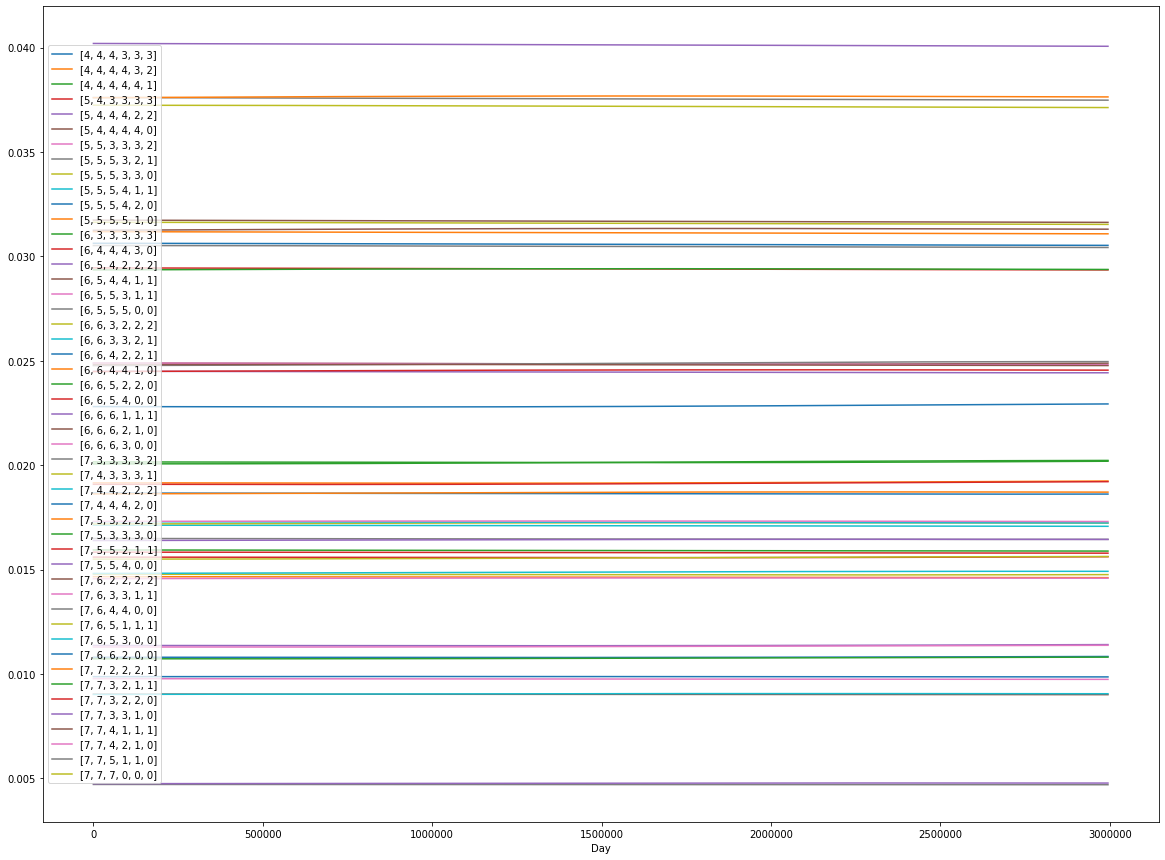

In [44]:
plt = df.plot(figsize=[20,15])

In [54]:
display(plt)

<AxesSubplot:xlabel='Day'>

In [62]:
pop.BNN(400000,5000)

0.0%
1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.000000000000001%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.000000000000002%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.000000000000004%
28.999999999999996%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.00000000000001%
56.00000000000001%
56.99999999999999%
57.99999999999999%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%
done!
